<a href="https://colab.research.google.com/github/LOGITHNATHAN/Multiple-Disease-Prediction/blob/main/Multiple_disease_prediction_system_parkinsons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_parkinsons = pd.read_csv(r'/content/parkinsons - parkinsons.csv')

In [ ]:
df_parkinsons.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [ ]:
df_parkinsons.shape

(195, 24)

In [ ]:
df_parkinsons.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
df_parkinsons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
df_parkinsons.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


In [ ]:
df_parkinsons = df_parkinsons.drop(columns=['name'], axis=1)

In [ ]:
df_parkinsons.shape

(195, 23)

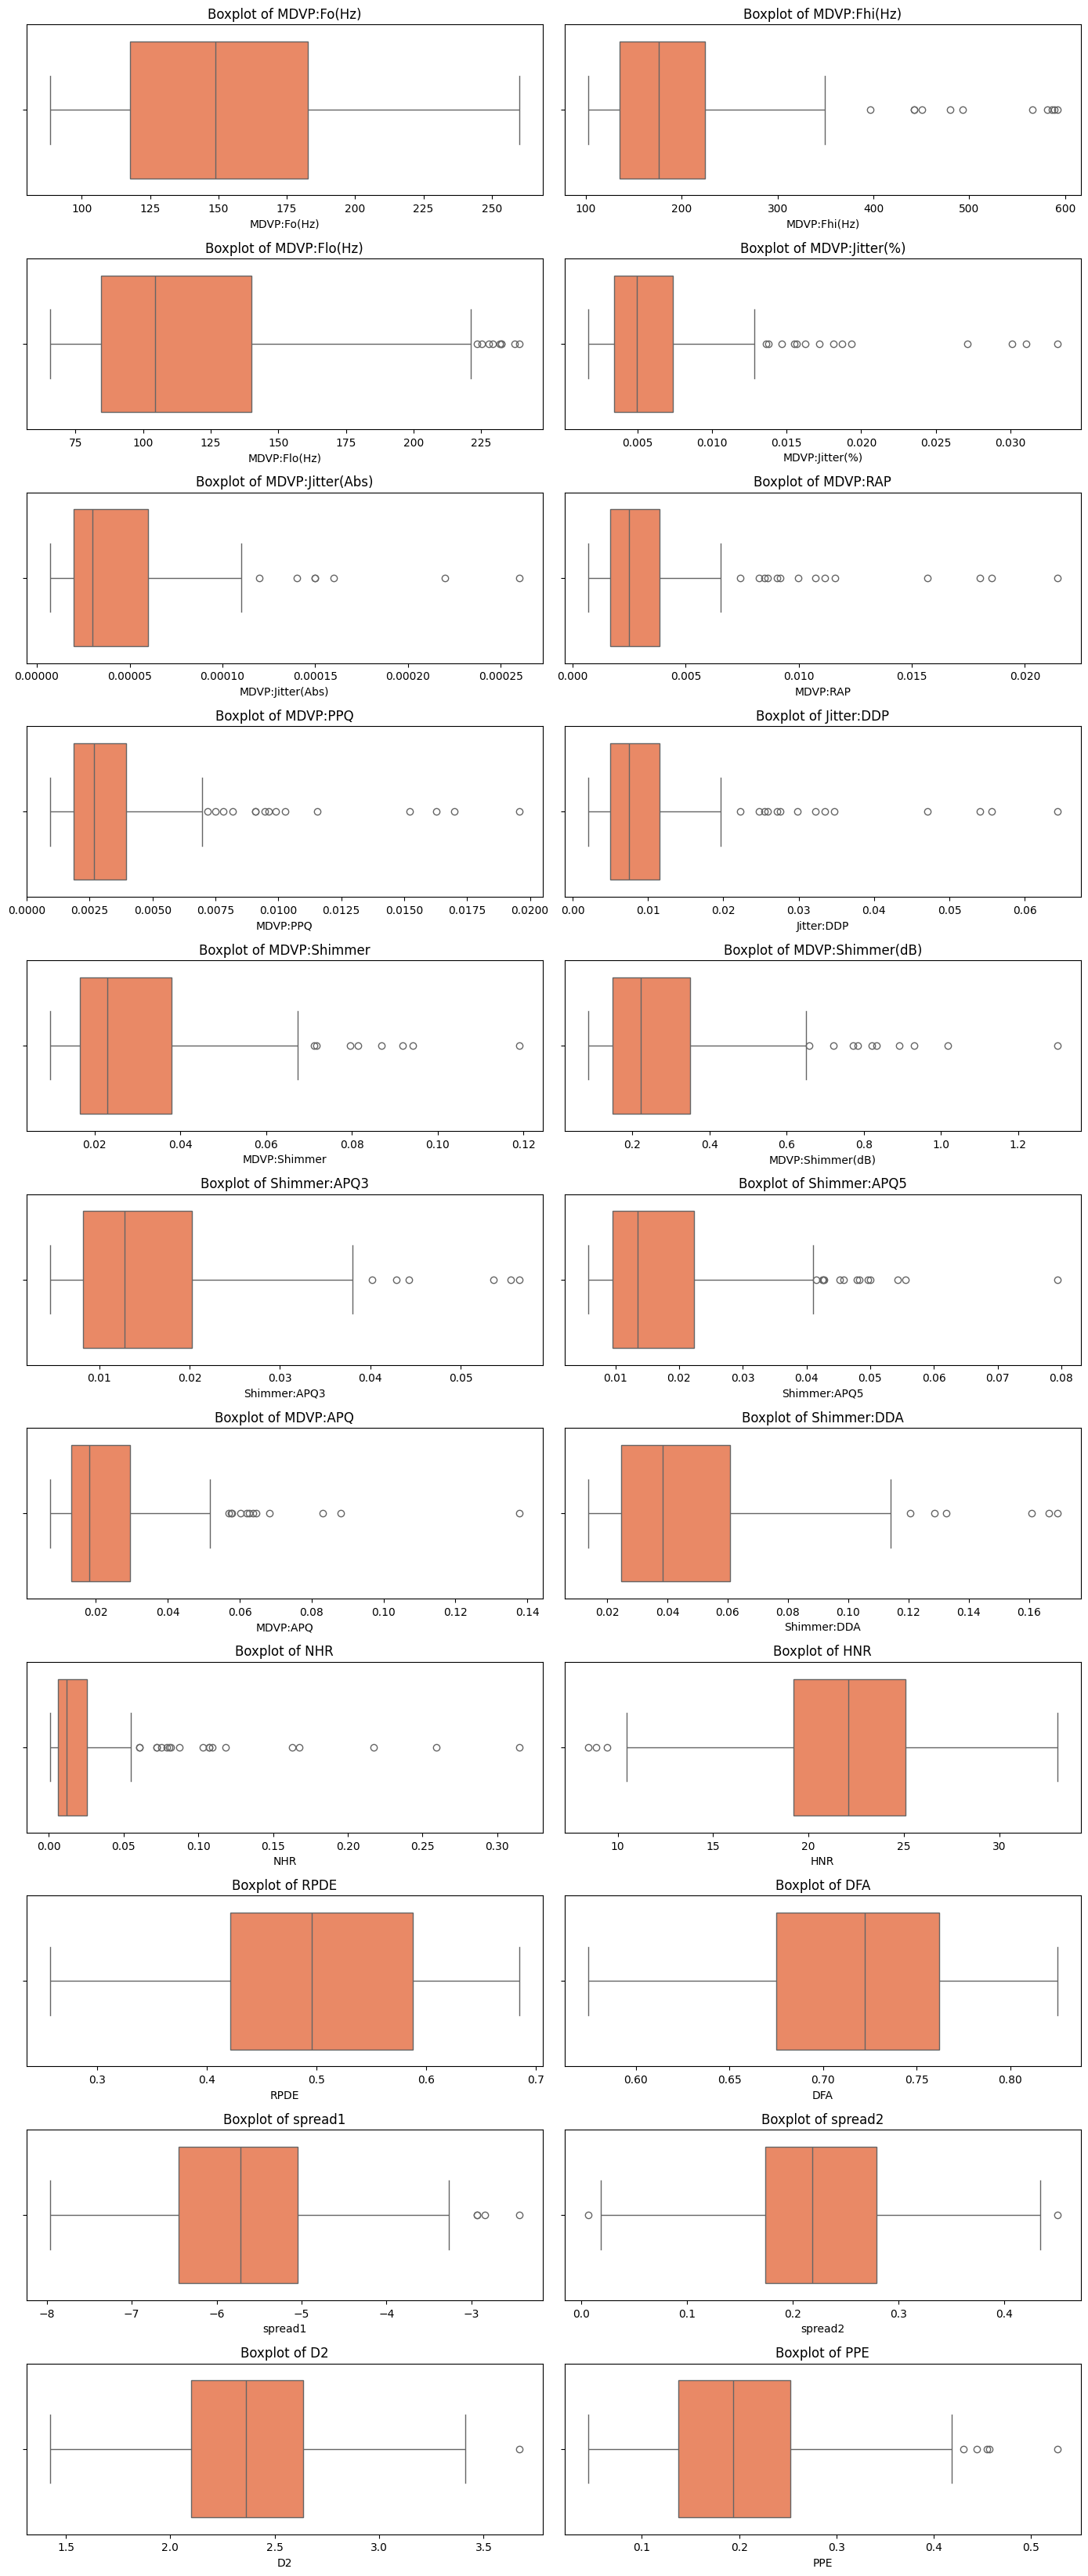

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter numeric columns excluding the target column 'status'
numeric_cols = [col for col in df_parkinsons.columns if col != 'status']

# Plot two boxplots per row
plt.figure(figsize=(14, 3 * ((len(numeric_cols) + 1) // 2)))
for i, col in enumerate(numeric_cols):
    plt.subplot((len(numeric_cols) + 1) // 2, 2, i + 1)
    sns.boxplot(x=df_parkinsons[col], color='coral')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

In [ ]:
# List of features to apply the method on
target_features = [
    'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)',
    'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)',
    'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR',
    'spread1', 'PPE'
]

# Apply the Q3 + IQR cap for each selected feature
for col in target_features:
    Q1 = df_parkinsons[col].quantile(0.25)
    Q3 = df_parkinsons[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + IQR  # Change multiplier if needed
    df_parkinsons.loc[df_parkinsons[col] > upper_bound, col] = upper_bound

    # Print the results inside the loop
    print(f"Feature: {col}")
    print(f"  Q1: {Q1:.4f}")
    print(f"  Q3: {Q3:.4f}")
    print(f"  IQR: {IQR:.4f}")
    print(f"  Upper Bound (Q3 + IQR): {upper_bound:.4f}")

    # Show how many values were capped
    capped_count = (df_parkinsons[col] == upper_bound).sum()
    print(f"  Number of capped values: {capped_count}\n")

Feature: MDVP:Fhi(Hz)
  Q1: 134.8625
  Q3: 224.2055
  IQR: 89.3430
  Upper Bound (Q3 + IQR): 313.5485
  Number of capped values: 12

Feature: MDVP:Flo(Hz)
  Q1: 84.2910
  Q3: 140.0185
  IQR: 55.7275
  Upper Bound (Q3 + IQR): 195.7460
  Number of capped values: 15

Feature: MDVP:Jitter(%)
  Q1: 0.0035
  Q3: 0.0074
  IQR: 0.0039
  Upper Bound (Q3 + IQR): 0.0113
  Number of capped values: 16

Feature: MDVP:Jitter(Abs)
  Q1: 0.0000
  Q3: 0.0001
  IQR: 0.0000
  Upper Bound (Q3 + IQR): 0.0001
  Number of capped values: 12

Feature: MDVP:RAP
  Q1: 0.0017
  Q3: 0.0038
  IQR: 0.0022
  Upper Bound (Q3 + IQR): 0.0060
  Number of capped values: 18

Feature: MDVP:PPQ
  Q1: 0.0019
  Q3: 0.0040
  IQR: 0.0021
  Upper Bound (Q3 + IQR): 0.0060
  Number of capped values: 19

Feature: Jitter:DDP
  Q1: 0.0050
  Q3: 0.0115
  IQR: 0.0065
  Upper Bound (Q3 + IQR): 0.0180
  Number of capped values: 18

Feature: MDVP:Shimmer
  Q1: 0.0165
  Q3: 0.0379
  IQR: 0.0214
  Upper Bound (Q3 + IQR): 0.0593
  Number of ca

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [ ]:
# Split features and target
X = df_parkinsons.drop(columns=['status'])
y = df_parkinsons['status']

In [ ]:
df_parkinsons['status'].value_counts()

,count
status,
1,147
0,48


In [ ]:
#status = 1 → Parkinson’s Disease present (positive case)
#status = 0 → Healthy individual (negative case)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
y_train.value_counts()

,count
status,
1,118
0,38


In [ ]:
y_test.value_counts()

,count
status,
1,29
0,10


In [ ]:
# Feature scaling (before SMOTE)
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Apply scaling to all columns (all are numeric)
X_train.loc[:, :] = scaler.fit_transform(X_train)
X_test.loc[:, :] = scaler.transform(X_test)

In [ ]:
print(X_train.head())
print(X_train.shape)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
172    -1.063446     -1.296127     -0.329266       -0.770126   
84      0.583421      0.387676     -0.987693        0.671831   
135    -1.070570     -1.039537     -0.185472       -0.261200   
42      2.087044      1.152394      2.209559       -0.984023   
143     1.229699      0.862773     -0.698564       -0.718496   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
172         -0.477113 -0.791464 -0.730639   -0.791846     -0.917288   
84          -0.085996  0.826254  0.747087    0.826581      1.188604   
135         -0.085996 -0.308758  0.041809   -0.311104      0.764372   
42          -1.259348 -0.797987 -0.851544   -0.798372     -0.746833   
143         -0.868231 -0.667526 -0.656753   -0.665678     -0.591006   

     MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA       NHR       HNR  \
172         -0.940756  ... -0.845460    -0.920418 -0.926769  1.055692   
84           1.104698  ...  0.968581     1

In [ ]:
print(X_test.head())
print(X_test.shape)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
185    -0.925284     -0.129917     -0.413073       -0.925017   
77     -1.067706     -1.080129     -0.151827       -0.379212   
76     -1.010219     -0.651099     -0.147578       -0.239073   
113     1.412421      0.884708      1.931052       -0.113686   
62      1.713679      0.859789      2.209559       -1.102035   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
185         -0.477113 -1.026294 -0.784375   -1.024604     -0.866406   
77          -0.085996 -0.426173 -0.193284   -0.428570     -0.462528   
76          -0.085996 -0.139158 -0.132832   -0.139254      0.682325   
113         -0.477113  0.193517 -0.193284    0.195743     -0.792627   
62          -1.259348 -0.908879 -1.106787   -0.907137     -0.816160   

     MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA       NHR       HNR  \
185         -0.920437  ... -0.514449    -1.021037 -0.709326  0.545728   
77          -0.507282  ... -0.559290    -0

In [ ]:
X_test.head(15)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
185,-0.925284,-0.129917,-0.413073,-0.925017,-0.477113,-1.026294,-0.784375,-1.024604,-0.866406,-0.920437,...,-0.514449,-1.021037,-0.709326,0.545728,0.948138,-1.176368,0.103873,-1.149989,-0.836753,0.098648
77,-1.067706,-1.080129,-0.151827,-0.379212,-0.085996,-0.426173,-0.193284,-0.428570,-0.462528,-0.507282,...,-0.559290,-0.304704,-0.933852,0.897345,-0.692135,1.772610,0.300129,0.296680,-1.537337,0.321927
76,-1.010219,-0.651099,-0.147578,-0.239073,-0.085996,-0.139158,-0.132832,-0.139254,0.682325,0.528991,...,0.311450,1.005671,-0.590334,0.365907,-0.109372,1.292736,-0.074688,1.420198,-0.963354,-0.149266
113,1.412421,0.884708,1.931052,-0.113686,-0.477113,0.193517,-0.193284,0.195743,-0.792627,-0.832388,...,-0.832415,-0.795804,-0.792195,0.431198,-0.579443,0.060004,-0.256844,0.293096,0.237574,-0.344790
62,1.713679,0.859789,2.209559,-1.102035,-1.259348,-0.908879,-1.106787,-0.907137,-0.816160,-0.859480,...,-0.914761,-0.788451,-0.990515,0.905154,-1.319177,-0.447028,-1.233747,-1.621671,-0.287705,-1.249931
85,0.686040,0.288164,1.140702,-0.585733,-0.868231,-0.465311,-0.435094,-0.467726,0.588828,0.400303,...,0.452496,0.650794,0.739115,-1.194570,0.803151,0.159991,0.040275,1.106868,1.757398,-0.070322
129,-0.830834,-1.057462,-0.182471,-1.087283,-0.868231,-1.143709,-1.167240,-1.142070,-1.211134,-1.231996,...,-1.156905,-1.242787,-0.886397,1.016431,-0.091837,-0.002158,-0.187731,-0.380379,-0.711449,-0.274826
178,-0.115686,-0.476554,0.702414,-0.943456,-0.868231,-0.908879,-0.824676,-0.909312,-0.860046,-0.879799,...,-0.825893,-0.820959,-0.885689,0.591931,-0.953104,0.792730,-0.596616,-0.548007,-0.355414,-0.557182
43,2.191109,1.180005,2.209559,-1.046717,-1.259348,-0.876264,-0.911996,-0.878858,-0.741744,-0.798522,...,-0.873180,-0.627847,-0.753240,0.317101,-0.418308,-1.541584,-1.065516,-0.848031,-0.342573,-1.077903
13,-0.355223,-0.096081,-0.955508,-0.644739,-0.477113,-0.824079,-0.676904,-0.822300,-0.816796,-0.798522,...,-0.428027,-0.950216,-0.494008,0.695399,-0.685517,-0.967002,0.038018,0.351457,0.313010,-0.076802


In [ ]:
import pandas as pd
# Set option to display all columns
pd.set_option('display.max_columns', None)
# Now show the first 15 rows with all columns
X_test.head(15)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
185,-0.925284,-0.129917,-0.413073,-0.925017,-0.477113,-1.026294,-0.784375,-1.024604,-0.866406,-0.920437,-1.021026,-0.783222,-0.514449,-1.021037,-0.709326,0.545728,0.948138,-1.176368,0.103873,-1.149989,-0.836753,0.098648
77,-1.067706,-1.080129,-0.151827,-0.379212,-0.085996,-0.426173,-0.193284,-0.428570,-0.462528,-0.507282,-0.304694,-0.561734,-0.559290,-0.304704,-0.933852,0.897345,-0.692135,1.772610,0.300129,0.296680,-1.537337,0.321927
76,-1.010219,-0.651099,-0.147578,-0.239073,-0.085996,-0.139158,-0.132832,-0.139254,0.682325,0.528991,1.006067,0.531925,0.311450,1.005671,-0.590334,0.365907,-0.109372,1.292736,-0.074688,1.420198,-0.963354,-0.149266
113,1.412421,0.884708,1.931052,-0.113686,-0.477113,0.193517,-0.193284,0.195743,-0.792627,-0.832388,-0.795794,-0.754608,-0.832415,-0.795804,-0.792195,0.431198,-0.579443,0.060004,-0.256844,0.293096,0.237574,-0.344790
62,1.713679,0.859789,2.209559,-1.102035,-1.259348,-0.908879,-1.106787,-0.907137,-0.816160,-0.859480,-0.788828,-0.658171,-0.914761,-0.788451,-0.990515,0.905154,-1.319177,-0.447028,-1.233747,-1.621671,-0.287705,-1.249931
85,0.686040,0.288164,1.140702,-0.585733,-0.868231,-0.465311,-0.435094,-0.467726,0.588828,0.400303,0.650804,0.809579,0.452496,0.650794,0.739115,-1.194570,0.803151,0.159991,0.040275,1.106868,1.757398,-0.070322
129,-0.830834,-1.057462,-0.182471,-1.087283,-0.868231,-1.143709,-1.167240,-1.142070,-1.211134,-1.231996,-1.242776,-1.209240,-1.156905,-1.242787,-0.886397,1.016431,-0.091837,-0.002158,-0.187731,-0.380379,-0.711449,-0.274826
178,-0.115686,-0.476554,0.702414,-0.943456,-0.868231,-0.908879,-0.824676,-0.909312,-0.860046,-0.879799,-0.821336,-0.819253,-0.825893,-0.820959,-0.885689,0.591931,-0.953104,0.792730,-0.596616,-0.548007,-0.355414,-0.557182
43,2.191109,1.180005,2.209559,-1.046717,-1.259348,-0.876264,-0.911996,-0.878858,-0.741744,-0.798522,-0.627450,-0.732354,-0.873180,-0.627847,-0.753240,0.317101,-0.418308,-1.541584,-1.065516,-0.848031,-0.342573,-1.077903
13,-0.355223,-0.096081,-0.955508,-0.644739,-0.477113,-0.824079,-0.676904,-0.822300,-0.816796,-0.798522,-0.950206,-0.844687,-0.428027,-0.950216,-0.494008,0.695399,-0.685517,-0.967002,0.038018,0.351457,0.313010,-0.076802


In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE (you can tune the 'random_state' for reproducibility)
smote = SMOTE(random_state=42)

# Apply SMOTE only on the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())


Before SMOTE: status
1    118
0     38
Name: count, dtype: int64
After SMOTE: status
0    118
1    118
Name: count, dtype: int64


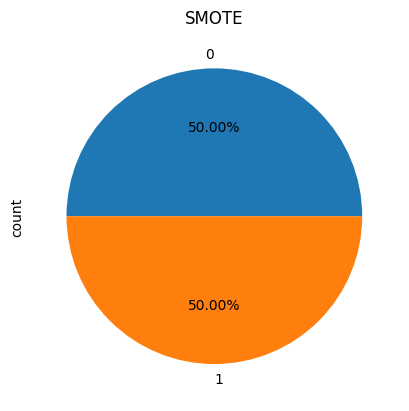

In [ ]:
ax = y_train_smote.value_counts().plot.pie(autopct='%1.2f%%')
_ = ax.set_title("SMOTE")

In [ ]:
print(X_train_smote.shape)
print(y_train_smote.shape)

(236, 22)
(236,)


In [ ]:
# MODEL TRAINING

# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
# Initialize model
logreg_model = LogisticRegression(random_state=42, max_iter=1000)

# Train on the SMOTE-applied training data
logreg_model.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Predict on test data (scaled)
y_pred_logreg = logreg_model.predict(X_test)

In [ ]:
# Classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.80      0.64        10
           1       0.92      0.76      0.83        29

    accuracy                           0.77        39
   macro avg       0.72      0.78      0.74        39
weighted avg       0.82      0.77      0.78        39



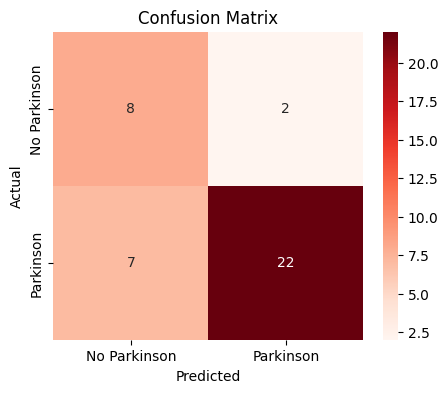

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_logreg)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["No Parkinson", "Parkinson"], yticklabels=["No Parkinson", "Parkinson"])
#status = 1 → Parkinson’s Disease present (positive case)
#status = 0 → Healthy individual (negative case)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
  # 5-fold cross-validation
cv_scores = cross_val_score(logreg_model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores: [0.79166667 0.89361702 0.85106383 0.87234043 0.85106383]
Mean CV Accuracy: 0.8519503546099291


In [ ]:
from xgboost import XGBClassifier
# Initialize XGBoost model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Train on SMOTE-applied training data
xgb_model.fit(X_train_smote, y_train_smote)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
# Evaluation (Shows performance metrics like precision/recall)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39



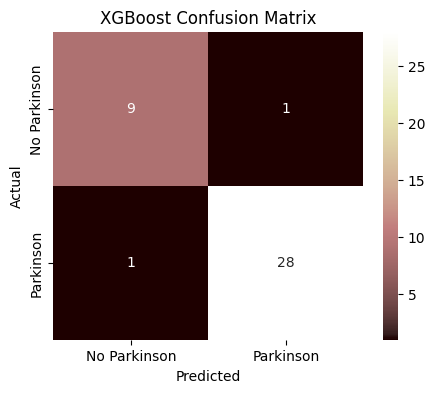

In [ ]:
# Confusion Matrix (Shows where the model got confused)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="pink", xticklabels=["No Parkinson", "Parkinson"], yticklabels=["No Parkinson", "Parkinson"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.show()

In [ ]:
#[9 1]     → 9 correctly predicted No Parkinson, 1 wrong
#[1 28]   → 28 correctly predicted Parkinson, 1 wrong Parkinson predictions

In [ ]:
# Perform 5-fold cross-validation (Ensures the model is stable and reliable on new data)
xgb_cv_scores = cross_val_score(xgb_model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')

# Print results
print("XGBoost Cross-Validation Accuracy Scores:", xgb_cv_scores)
print("Mean CV Accuracy (XGBoost):", xgb_cv_scores.mean())

XGBoost Cross-Validation Accuracy Scores: [0.85416667 0.95744681 0.9787234  0.95744681 0.9787234 ]
Mean CV Accuracy (XGBoost): 0.9453014184397164


In [ ]:
import os
import pickle
from xgboost import XGBClassifier

# Define directory and file path for saving the model
models_dir = r'F:\vscode\Multiple Disease Prediction\models'
model_filename = 'xgb_parkinson_model.pkl'
model_path = os.path.join(models_dir, model_filename)

# Make sure the directory exists
os.makedirs(models_dir, exist_ok=True)

# Save the trained XGBoost model to file
with open(model_path, 'wb') as file:
    pickle.dump(xgb_model, file)

print(f"XGBoost model saved successfully at: {model_path}")

XGBoost model saved successfully at: F:\vscode\Multiple Disease Prediction\models/xgb_parkinson_model.pkl
